# *Part 1 - Data preprocessing*

## The libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## The dataset

In [2]:
## training dataset
dataset_train = pd.read_csv('/kaggle/input/emotions-analysis/EA-train.txt', delimiter=';', quoting=3) 

In [3]:
dataset_train.shape

(15999, 2)

In [4]:
dataset_train.columns = ['comment', 'emotion']  ## name the columns

In [5]:
## test dataset
dataset_test = pd.read_csv('/kaggle/input/emotions-analysis/EA-test.txt', delimiter=';', quoting=3) 

In [6]:
dataset_test.shape

(1999, 2)

In [7]:
dataset_test.columns = ['comment', 'emotion']  ## name the columns

In [8]:
dataset_test.head(6)

,comment,emotion
0,im updating my blog because i feel shitty,sadness
1,i never make her separate from me because i do...,sadness
2,i left with my bouquet of red and yellow tulip...,joy
3,i was feeling a little vain when i did this one,sadness
4,i cant walk into a shop anywhere where i do no...,fear
5,i felt anger when at the end of a telephone call,anger


In [9]:
dataset_train['emotion'] = dataset_train['emotion'].replace({'sadness':0, 'anger':1, 'love':2, 'surprise':3, 'fear':4, 'joy':5}).astype(int)
dataset_test['emotion'] = dataset_test['emotion'].replace({'sadness':0, 'anger':1, 'love':2, 'surprise':3, 'fear':4, 'joy':5}).astype(int)

## Missing data

In [10]:
dataset_train.columns[dataset_train.isnull().sum() > 0]

Index([], dtype='object')

In [11]:
dataset_test.columns[dataset_test.isnull().sum() > 0]

Index([], dtype='object')

## Cleaning the text

In [12]:
## cleaning the training text
import re
import nltk 
nltk.download('stopwords')  ## stop words that are not necessary for predictions
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  ## used to apply steming on the text
corpus_tra = []  ## list to include the cleaned text in.
for i in range(0,15999): ## 15999: number of lines 
  review = re.sub('[^a-zA-z]', ' ', dataset_train['comment'][i]) ## substitute everything in the text that is not a letter by space, dataset['col1']: name of the col includes the text
  review = review.lower()  ## all the the text in lower case.
  review = review.split() ## split the text into words
  ps = PorterStemmer()  ## object of the stemmer
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')  ## remove (not) from stopwords
  review = [ ps.stem(word) for word in review if not word in set(all_stopwords) ]  ## remove all stopwords from the text
  review = ' '.join(review) ## join the words seperated by spaces
  corpus_tra.append(review)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus_tra[0]

'go feel hopeless damn hope around someon care awak'

In [14]:
## cleaning the test text
corpus_test = []  ## list to include the cleaned text in.
for i in range(0,1999): ## 1999: number of lines 
  review = re.sub('[^a-zA-z]', ' ', dataset_test['comment'][i]) ## substitute everything in the text that is not a letter by space, dataset['col1']: name of the col includes the text
  review = review.lower()  ## all the the text in lower case.
  review = review.split() ## split the text into words
  ps = PorterStemmer()  ## object of the stemmer
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')  ## remove (not) from stopwords
  review = [ ps.stem(word) for word in review if not word in set(all_stopwords) ]  ## remove all stopwords from the text
  review = ' '.join(review) ## join the words seperated by spaces
  corpus_test.append(review)

In [15]:
corpus_test[0]

'im updat blog feel shitti'

## Creating the bag of words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  ## vector for each sentence
X_train = cv.fit_transform(corpus_tra).toarray()  ## text stored in array
y_train = dataset_train.iloc[:,-1].values
X_test = cv.transform(corpus_test).toarray()  ## text stored in array
y_test = dataset_test.iloc[:,-1].values

In [17]:
y_train, y_test

(array([0, 1, 2, ..., 5, 1, 0]), array([0, 0, 5, ..., 5, 5, 4]))

In [18]:
X_train, X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

# *Part 2 - The machine learning models*

## Defining the models and hyperparameter tuning

In [19]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV ## used for tuning the models parameters

### Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

## range for the parameters used in the model
param_grid = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]} 
 
# Instantiating RandomizedSearchCV object
dt_cv = RandomizedSearchCV(dt, param_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)  ## cv: number of random samples taken
 
dt_cv.fit(X_train, y_train)
 
# Print the best tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score is {}".format(dt_cv.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=7; total time=   1.3s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=5; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=5; total time=   0.8s
[CV] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=

In [21]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 4, min_samples_leaf= 1)

### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
param_grid = {"alpha": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]} 

# Instantiating RandomizedSearchCV object
nb_cv = RandomizedSearchCV(nb, param_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = 1)  ## cv: number of random samples taken
 
nb_cv.fit(X_train, y_train)
 
# Print the best tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(nb_cv.best_params_))
print("Best score is {}".format(nb_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .........................................alpha=0.05; total time=   5.2s
[CV] END .........................................alpha=0.05; total time=   5.2s
[CV] END .........................................alpha=0.05; total time=   5.3s
[CV] END .........................................alpha=0.05; total time=   5.4s
[CV] END .........................................alpha=0.05; total time=   5.4s
[CV] END ..........................................alpha=0.1; total time=   5.3s
[CV] END ..........................................alpha=0.1; total time=   5.3s
[CV] END ..........................................alpha=0.1; total time=   5.3s
[CV] END ..........................................alpha=0.1; total time=   5.3s
[CV] END ..........................................alpha=0.1; total time=   5.4s
[CV] END .........................................alpha=0.15; total time=   5.3s
[CV] END .........................................alpha=0.15; total time=   5.3s
[CV] END ...................

In [23]:
nb = MultinomialNB(alpha=0.4)

# *Part 3 - Training and testing the models*

## Train the models

In [24]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.4)

## Testing the models

In [25]:
y_pred = nb.predict(X_test)

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [5 5]
 ...
 [5 5]
 [5 5]
 [4 4]]


In [27]:
## confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  ## TN & FP \n FN & TP  
print(cm)

[[516  15   6   2  10  31]
 [ 42 193   1   2  16  21]
 [ 20   7  68   1   1  62]
 [ 10   1   0  16  16  23]
 [ 37  10   3   2 153  19]
 [ 26  13  20   2  11 623]]


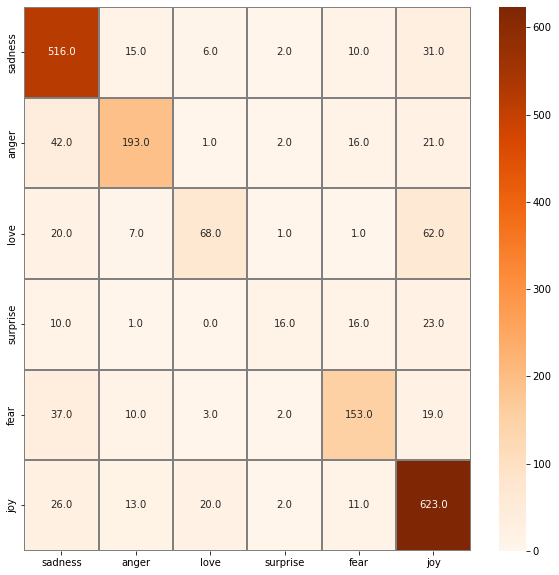

In [28]:
## plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
from sklearn.metrics import plot_confusion_matrix
sns.heatmap(cm, annot=True, xticklabels = labels, yticklabels=labels, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.show()

# *Part 4 - Predicting new results*

In [29]:
def pred_outcome(new_comment):
    new_comment = re.sub('[^a-zA-Z]', ' ', new_comment)
    new_comment = new_comment.lower()
    new_comment = new_comment.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_comment = [ps.stem(word) for word in new_comment if not word in set(all_stopwords)]
    new_comment = ' '.join(new_comment)
    new_corpus = [new_comment]
    new_X = cv.transform(new_corpus).toarray()
    new_y_pred = nb.predict(new_X)
    if (new_y_pred == 0):
        print("Sadness")
    elif (new_y_pred ==1):
        print("Anger")
    elif (new_y_pred ==2):
        print("Love")
    elif (new_y_pred ==3):
        print("Surprise")
    elif (new_y_pred ==4):
        print("Fear")
    elif (new_y_pred ==5):
        print("Joy")

In [30]:
comment = 'i do feel insecure sometimes but who doesnt'
pred_outcome(comment)

Fear
